In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  

import scipy.stats as stats  
import statsmodels.api as sm  

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  

sns.set(style="whitegrid")  

%matplotlib inline

In [2]:
df = pd.read_excel("Analysing Spain's Emerging Talents in 2025.xlsx")
print(df)

               Player Nation Pos  Age   90s  PassCmp  PassAttempts  Cmp%   
0        Lamine Yamal    ESP  FW   17  27.7      970          1305  74.3  \
1         Marc Bernal    ESP  MF   17   2.7      148           160  92.5   
2         Pau Cubarsí    ESP  DF   18  26.0     2283          2442  93.5   
3         Héctor Fort    ESP  DF   18   6.0      410           455  90.1   
4    Daniel Rodriguez    ESP  FW   19   0.4       15            20  75.0   
..                ...    ...  ..  ...   ...      ...           ...   ...   
126      Mario Maroto    ESP  MF   21   0.2       11            15  73.3   
127       Raúl Chasco    ESP  DF   21   1.4       35            58  60.3   
128       Arnau Rafús    ESP  GK   22   1.0       33            43  76.7   
129      David Torres    ESP  DF   22  15.4      589           714  82.5   
130         Raúl Moro    ESP  MF   22  22.2      438           669  65.5   

     TotDist  PrgPassDist  ShortPassCmp  ShortPassAttempts  Cmp%.1   
0      13667     

In [64]:
df.isnull()

,Player,Nation,Pos,Age,90s,PassCmp,PassAttempts,Cmp%,TotDist,PrgPassDist,ShortPassCmp,ShortPassAttempts,Cmp%.1,MedPassCmp,MedPassAttempts,Cmp%.2,LongPassCmp,LongPassAttempts,Cmp%.3,Ast,xAG,xA,A-xAG,KP,PassF3rd,PPA,CrsPA,PrgP,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh.2,Pass,Int,Tkl+Int,Clr,Err,Club
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
df.isnull().sum()

Player     0
Nation     0
Pos        0
Age        0
90s        0
          ..
Int        0
Tkl+Int    0
Clr        0
Err        0
Club       0
Length: 61, dtype: int64

In [66]:
df.dropna()

,Player,Nation,Pos,Age,90s,PassCmp,PassAttempts,Cmp%,TotDist,PrgPassDist,ShortPassCmp,ShortPassAttempts,Cmp%.1,MedPassCmp,MedPassAttempts,Cmp%.2,LongPassCmp,LongPassAttempts,Cmp%.3,Ast,xAG,xA,A-xAG,KP,PassF3rd,PPA,CrsPA,PrgP,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh.2,Pass,Int,Tkl+Int,Clr,Err,Club
0,Lamine Yamal,ESP,FW,17,27.7,970,1305,74.3,13667,3943,602,701,85.9,280,387,72.4,47,102,46.1,12,12.4,10.1,-0.4,57,69,86,14,142,163.0,5.88,101.0,3,33,14,10,2,26,0.94,18.0,0,4,2,2,0,39,26,5,17,17,15,34,44.1,19,12,0,12,13,52,3,0,Barcelona
1,Marc Bernal,ESP,MF,17,2.7,148,160,92.5,2634,623,66,71,93.0,72,77,93.5,10,11,90.9,0,0.0,0.1,0.0,1,12,0,0,8,1.0,0.37,0.0,1,0,0,0,0,0,0.00,0.0,0,0,0,0,0,8,6,2,5,1,7,8,87.5,1,5,1,4,1,9,4,0,Barcelona
2,Pau Cubarsí,ESP,DF,18,26.0,2283,2442,93.5,42926,14908,765,802,95.4,1314,1363,96.4,180,234,76.9,3,1.6,0.9,1.4,9,199,4,1,186,33.0,1.27,32.0,0,0,1,0,0,6,0.23,5.0,0,0,1,0,0,28,18,18,7,3,16,25,64.0,9,10,8,2,13,41,75,1,Barcelona
3,Héctor Fort,ESP,DF,18,6.0,410,455,90.1,5717,1272,232,246,94.3,137,151,90.7,13,16,81.3,0,0.8,1.3,-0.8,8,23,3,0,24,14.0,2.33,13.0,1,0,0,0,0,1,0.17,1.0,0,0,0,0,0,13,8,6,4,3,10,15,66.7,5,11,0,11,6,19,15,0,Barcelona
4,Daniel Rodriguez,ESP,FW,19,0.4,15,20,75.0,202,28,9,11,81.8,6,8,75.0,0,1,0.0,0,0.0,0.0,0.0,0,0,2,0,2,2.0,4.86,2.0,0,0,0,0,0,0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,1,0,0,0,0,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Mario Maroto,ESP,MF,21,0.2,11,15,73.3,200,65,6,6,100.0,3,4,75.0,2,2,100.0,1,0.1,0.0,0.9,1,2,0,0,1,2.0,9.47,2.0,0,0,0,0,0,1,4.74,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0,0,0,2,2,1,0,Valladolid
127,Raúl Chasco,ESP,DF,21,1.4,35,58,60.3,730,329,15,19,78.9,13,20,65.0,7,16,43.8,0,0.0,0.1,0.0,1,5,1,0,3,2.0,1.38,2.0,0,0,0,0,0,1,0.69,1.0,0,0,0,0,0,4,1,3,1,0,2,4,50.0,2,1,0,1,2,6,2,0,Valladolid
128,Arnau Rafús,ESP,GK,22,1.0,33,43,76.7,1001,672,4,4,100.0,20,21,95.2,9,17,52.9,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.00,0.0,0,0,0,0,0,0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,1,Valladolid
129,David Torres,ESP,DF,22,15.4,589,714,82.5,11231,4594,193,205,94.1,335,373,89.8,59,115,51.3,0,0.0,0.1,0.0,1,27,1,1,37,3.0,0.19,3.0,0,0,0,0,0,0,0.00,0.0,0,0,0,0,0,13,8,12,1,0,7,11,63.6,4,19,17,2,10,23,74,0,Valladolid


Defensive Contribution (Tackles + Interceptions) for U23 Defenders (Top 10)

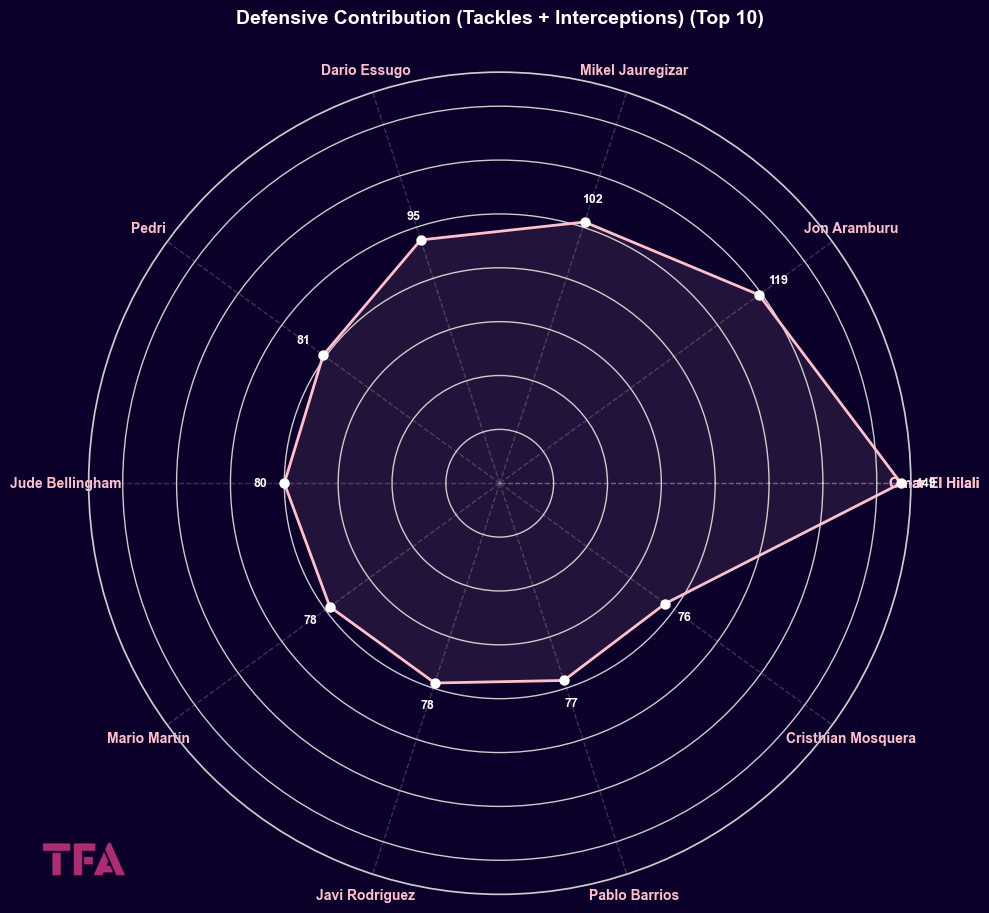

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

df_df = df[df['Pos'].isin(['DF', 'MF'])].copy()
df_df = df_df.sort_values(by='Tkl+Int', ascending=False).head(10)

players = df_df['Player']
tkl_int = df_df['Tkl+Int'].values
num_vars = len(players)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
tkl_int = np.append(tkl_int, tkl_int[0])
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_facecolor('#0A002A')  
fig.patch.set_facecolor('#0A002A') 

ax.plot(angles, tkl_int, color='pink', linewidth=2)
ax.fill(angles, tkl_int, color='pink', alpha=0.1)

for i in range(num_vars):
    ax.scatter(angles[i], tkl_int[i], s=30, color = 'white', edgecolors='white', linewidth=2, zorder=2)

    ax.text(
        angles[i], tkl_int[i] + max(tkl_int)*0.06,
        f"{int(tkl_int[i])}",
        ha='center', va='center',
        color='white', fontsize=9, weight='bold'
    )

players_list = list(players)
players_list.append(players_list[0])
ax.set_xticks(angles)
ax.set_xticklabels(players_list, color='pink', fontsize=10, weight='bold')

ax.set_yticklabels([])
ax.xaxis.grid(True, color='white', linestyle='--', alpha=0.2)

plt.title('Defensive Contribution (Tackles + Interceptions) (Top 10)', color='white', fontsize=14, weight='bold', pad=35)

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))

fig.figimage(
    tfa_logo, 
    xo=30, 
    alpha=0.7, 
    zorder=1
)

plt.tight_layout()
plt.show()

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

df_df = df[df['Pos'].isin(['DF', 'MF'])].copy()
df_df = df_df.sort_values(by='Tkl+Int', ascending=False).head(10)

players = df_df['Player']
tkl_int = df_df['Tkl+Int'].values
num_vars = len(players)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
tkl_int = np.append(tkl_int, tkl_int[0])
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True), dpi=300)
ax.set_facecolor('#0A002A')  
fig.patch.set_facecolor('#0A002A') 

ax.plot(angles, tkl_int, color='pink', linewidth=2)
ax.fill(angles, tkl_int, color='pink', alpha=0.1)

for i in range(num_vars):
    ax.scatter(angles[i], tkl_int[i], s=40, color='white', edgecolors='white', linewidth=2, zorder=2)
    ax.text(
        angles[i], tkl_int[i] + max(tkl_int)*0.06,
        f"{int(tkl_int[i])}",
        ha='center', va='center',
        color='white', fontsize=10, weight='bold'
    )

players_list = list(players)
players_list.append(players_list[0])
ax.set_xticks(angles)
ax.set_xticklabels(players_list, color='pink', fontsize=11, weight='bold')

ax.set_yticklabels([])
ax.xaxis.grid(True, color='white', linestyle='--', alpha=0.2)

plt.title(
    'Defensive Contribution (Tackles + Interceptions) (Top 10)',
    color='white', fontsize=16, weight='bold', pad=35
)

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.95), int(logo_height * 0.95)))

fig.figimage(
    tfa_logo, 
    xo=40, 
    yo=40,
    alpha=0.8, 
    zorder=3
)

plt.tight_layout()
plt.savefig("u23_defensive_contribution_radar.png", dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close()


Top 10 Players in Defensive Pressure

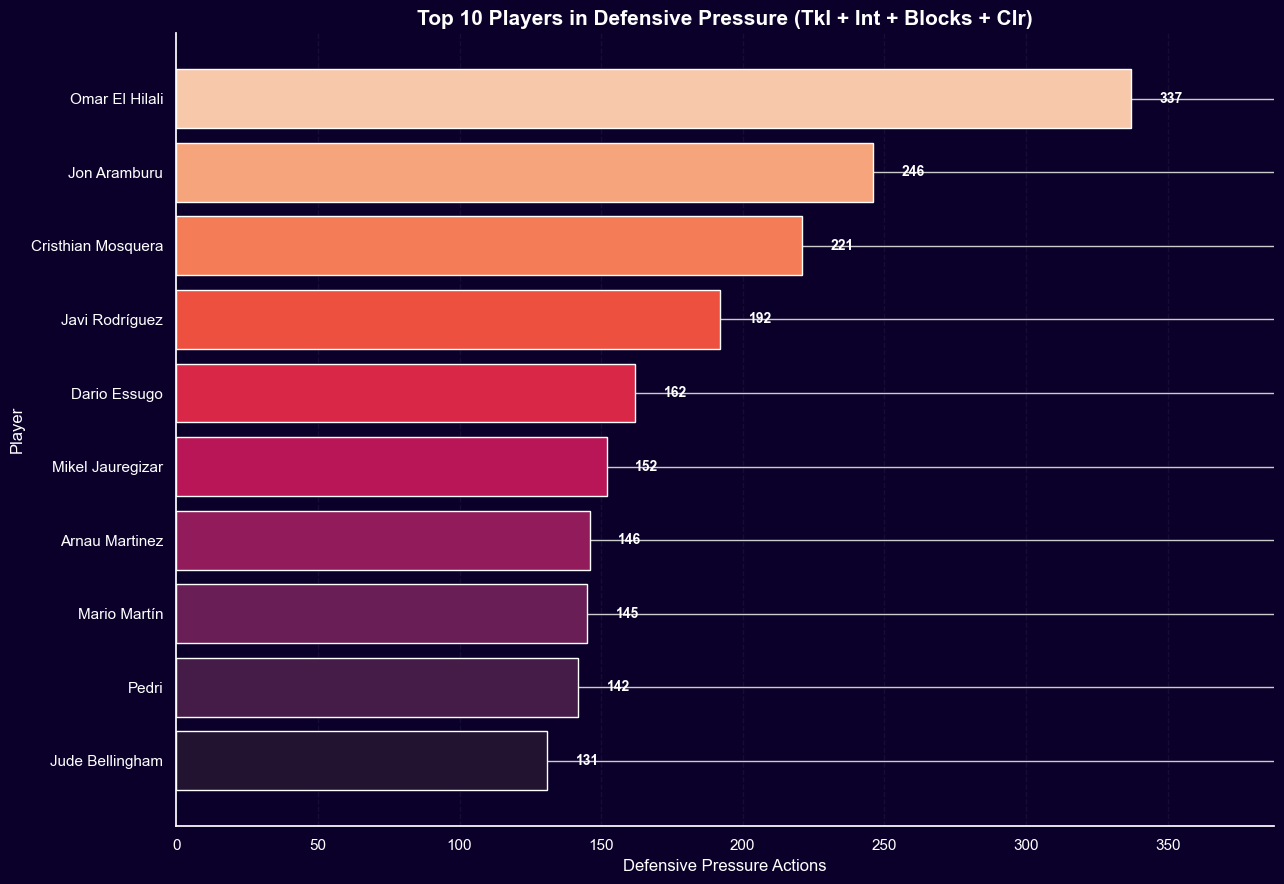

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df_def = df[df['Pos'].isin(['DF', 'MF'])].copy()
df_def['DefPressure'] = df_def['Tkl'] + df_def['Int'] + df_def['Blocks'] + df_def['Clr']
df_top = df_def.sort_values(by='DefPressure', ascending=True).tail(10) 

players = df_top['Player']
pressure = df_top['DefPressure']
colors = sns.color_palette("rocket", n_colors=len(players))  

fig, ax = plt.subplots(figsize=(13, 9))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bars = ax.barh(players, pressure, color=colors)

max_pressure = pressure.max()
for i, value in enumerate(pressure):
    ax.text(value + max_pressure * 0.03, i,
            f'{int(value)}',
            va='center', color='white', fontsize=10, weight='bold')

ax.set_xlim(0, max_pressure + max_pressure * 0.15)
ax.set_title('Top 10 Players in Defensive Pressure (Tkl + Int + Blocks + Clr)',
             color='white', fontsize=15, weight='bold')
ax.set_xlabel('Defensive Pressure Actions', color='white')
ax.set_ylabel('Player', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.05, axis='x')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

df_def = df[df['Pos'].isin(['DF', 'MF'])].copy()
df_def['DefPressure'] = df_def['Tkl'] + df_def['Int'] + df_def['Blocks'] + df_def['Clr']
df_top = df_def.sort_values(by='DefPressure', ascending=True).tail(10)

players = df_top['Player']
pressure = df_top['DefPressure']
colors = sns.color_palette("rocket", n_colors=len(players))

fig, ax = plt.subplots(figsize=(13, 9), dpi=300)
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bars = ax.barh(players, pressure, color=colors)

max_pressure = pressure.max()
for i, value in enumerate(pressure):
    ax.text(value + max_pressure * 0.03, i,
            f'{int(value)}',
            va='center', color='white', fontsize=10, weight='bold')

ax.set_xlim(0, max_pressure + max_pressure * 0.15)
ax.set_title('Top 10 Players in Defensive Pressure (Tkl + Int + Blocks + Clr)',
             color='white', fontsize=15, weight='bold')
ax.set_xlabel('Defensive Pressure Actions', color='white')
ax.set_ylabel('Player', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.05, axis='x')

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.95), int(logo_height * 0.95)))

fig.figimage(
    tfa_logo, 
    xo=40, 
    yo=40,  
    alpha=0.8, 
    zorder=3
)

plt.tight_layout()
plt.savefig("u23_defensive_pressure_barh.png", dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close()

Top 10 FWs in Defensive Pressure (Tkl + Int + Blocks + Clr)

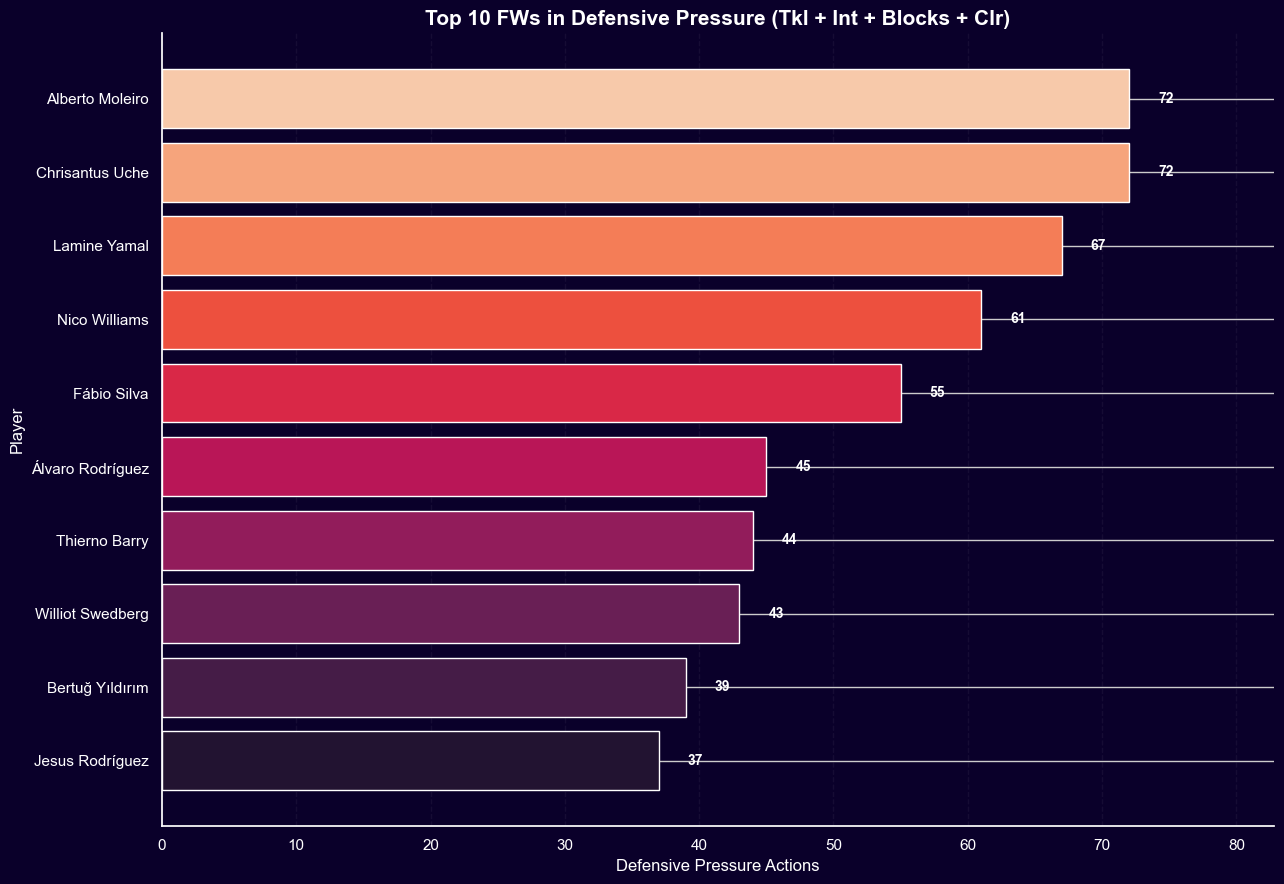

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df_fw = df[df['Pos'] == 'FW'].copy()
df_fw['DefPressure'] = df_fw['Tkl'] + df_fw['Int'] + df_fw['Blocks'] + df_fw['Clr']
df_top = df_fw.sort_values(by='DefPressure', ascending=True).tail(10) 

players = df_top['Player']
pressure = df_top['DefPressure']
colors = sns.color_palette("rocket", n_colors=len(players))  

fig, ax = plt.subplots(figsize=(13, 9))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bars = ax.barh(players, pressure, color=colors)

max_pressure = pressure.max()
for i, value in enumerate(pressure):
    ax.text(value + max_pressure * 0.03, i,
            f'{int(value)}',
            va='center', color='white', fontsize=10, weight='bold')

ax.set_xlim(0, max_pressure + max_pressure * 0.15)
ax.set_title('Top 10 FWs in Defensive Pressure (Tkl + Int + Blocks + Clr)',
             color='white', fontsize=15, weight='bold')
ax.set_xlabel('Defensive Pressure Actions', color='white')
ax.set_ylabel('Player', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.05, axis='x')

plt.tight_layout()
plt.show()

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

df_fw = df[df['Pos'] == 'FW'].copy()
df_fw['DefPressure'] = df_fw['Tkl'] + df_fw['Int'] + df_fw['Blocks'] + df_fw['Clr']
df_top = df_fw.sort_values(by='DefPressure', ascending=True).tail(10)

players = df_top['Player']
pressure = df_top['DefPressure']
colors = sns.color_palette("rocket", n_colors=len(players))

fig, ax = plt.subplots(figsize=(13, 9), dpi=300)
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bars = ax.barh(players, pressure, color=colors)

max_pressure = pressure.max()
for i, value in enumerate(pressure):
    ax.text(value + max_pressure * 0.03, i,
            f'{int(value)}',
            va='center', color='white', fontsize=10, weight='bold')

ax.set_xlim(0, max_pressure + max_pressure * 0.15)
ax.set_title('Top 10 FWs in Defensive Pressure (Tkl + Int + Blocks + Clr)',
             color='white', fontsize=15, weight='bold')
ax.set_xlabel('Defensive Pressure Actions', color='white')
ax.set_ylabel('Player', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.05, axis='x')

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.95), int(logo_height * 0.95)))

fig.figimage(
    tfa_logo, 
    xo=40, 
    yo=40,  
    alpha=0.8, 
    zorder=3
)

plt.tight_layout()
plt.savefig("u23_defensive_pressure_FWs.png", dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close()

In [44]:
from PIL import Image

df_fw = df[df['Pos'] == 'FW'].copy()
df_fw['DefPressure'] = df_fw['Tkl'] + df_fw['Int'] + df_fw['Blocks'] + df_fw['Clr']
df_top = df_fw.sort_values(by='DefPressure', ascending=True).tail(10)

players = df_top['Player']
pressure = df_top['DefPressure']
colors = sns.color_palette("rocket", n_colors=len(players))

fig, ax = plt.subplots(figsize=(13, 9), dpi=300)
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bars = ax.barh(players, pressure, color=colors)

max_pressure = pressure.max()
for i, value in enumerate(pressure):
    ax.text(value + max_pressure * 0.03, i,
            f'{int(value)}',
            va='center', color='white', fontsize=12, weight='bold')

ax.set_xlim(0, max_pressure + max_pressure * 0.15)
ax.set_title('Top 10 Forwards in Defensive Pressure\n(Tackles + Interceptions + Blocks + Clearances)',
             color='white', fontsize=18, weight='bold', loc='left', pad=20)

ax.set_xlabel('Defensive Pressure Actions', color='white', fontsize=12)
ax.set_ylabel('Player', color='white', fontsize=12)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(color='white', linestyle='--', alpha=0.05, axis='x')

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.9), int(logo_height * 0.9)))

fig.figimage(
    tfa_logo, 
    xo=40, 
    yo=40,  
    alpha=0.8, 
    zorder=3
)

plt.tight_layout()
plt.savefig("u23_defensive_pressure_FWs_OPTAstyle.png", dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close()

Top 10 Defenders: Progressive Passes vs Completed Passes

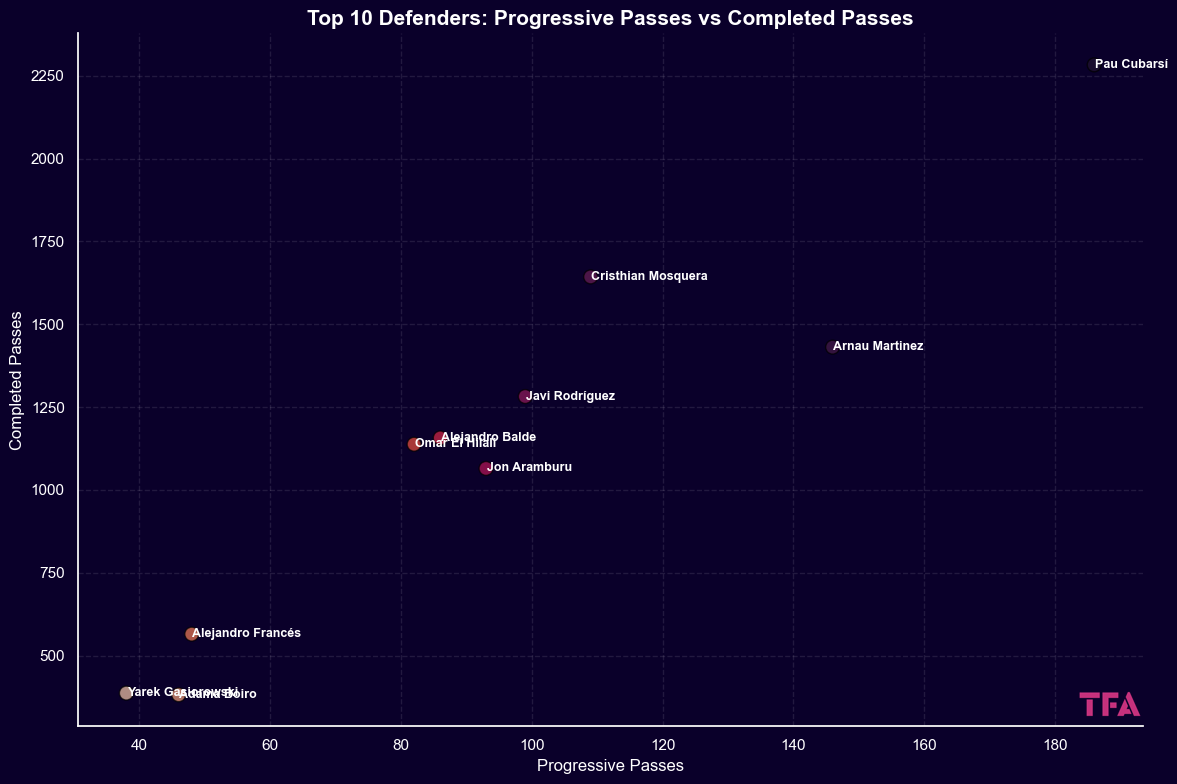

In [63]:
df_defenders = df[df['Pos'] == 'DF'].copy()

x = df_defenders['PrgP']  
y = df_defenders['PassCmp']  

df_top_10 = df_defenders.nlargest(10, 'PrgP')

colors = sns.color_palette("rocket", n_colors=len(df_top_10))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

scatter = ax.scatter(df_top_10['PrgP'], df_top_10['PassCmp'], c=colors, s=100, alpha=0.7, edgecolors='black')

for i, player in enumerate(df_top_10['Player']):
    ax.text(df_top_10['PrgP'].iloc[i] + 0.1, df_top_10['PassCmp'].iloc[i], player, fontsize=9, ha='left', va='center', color='white', weight='bold')

ax.set_title('Top 10 Defenders: Progressive Passes vs Completed Passes', color='white', fontsize=15, weight='bold')
ax.set_xlabel('Progressive Passes', color='white')
ax.set_ylabel('Completed Passes', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(color='white', linestyle='--', alpha=0.1)

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.2), int(logo_height * 0.2)))

fig.figimage(
    tfa_logo, 
    xo=1070, 
    yo=40,  
    alpha=0.8, 
    zorder=3
)

plt.tight_layout()
plt.show()

Top 10 Defenders: Defensive Work Rate vs Errors

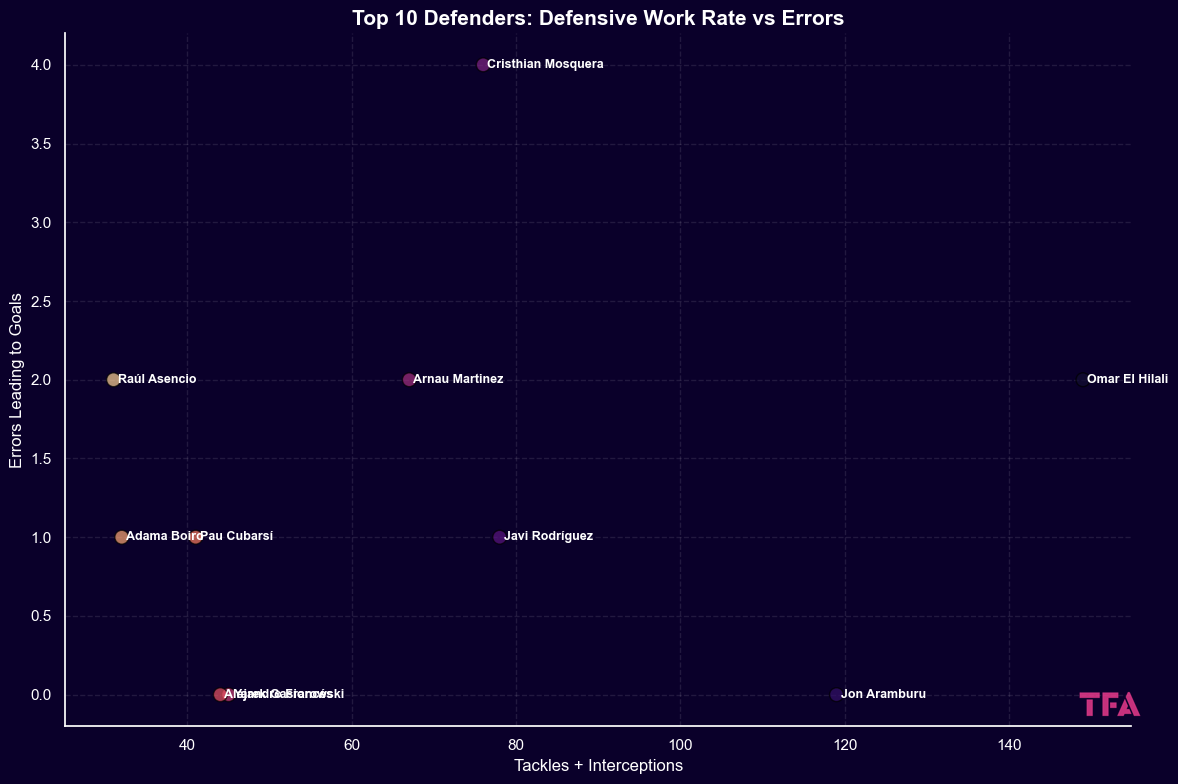

In [4]:
df_defenders = df[df['Pos'] == 'DF'].copy()

x = df_defenders['Tkl+Int']
y = df_defenders['Err']

df_top_10 = df_defenders.nlargest(10, 'Tkl+Int')

colors = sns.color_palette("magma", n_colors=len(df_top_10))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

scatter = ax.scatter(df_top_10['Tkl+Int'], df_top_10['Err'], c=colors, s=100, alpha=0.7, edgecolors='black')

for i, player in enumerate(df_top_10['Player']):
    ax.text(df_top_10['Tkl+Int'].iloc[i] + 0.5, df_top_10['Err'].iloc[i], player, fontsize=9, ha='left', va='center', color='white', weight='bold')

ax.set_title('Top 10 Defenders: Defensive Work Rate vs Errors', color='white', fontsize=15, weight='bold')
ax.set_xlabel('Tackles + Interceptions', color='white')
ax.set_ylabel('Errors Leading to Goals', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(color='white', linestyle='--', alpha=0.1)

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.2), int(logo_height * 0.2)))

fig.figimage(
    tfa_logo, 
    xo=1070, 
    yo=40,  
    alpha=0.8, 
    zorder=3
)

plt.tight_layout()
plt.show()

Top 10 Defenders: Clearances vs Blocks

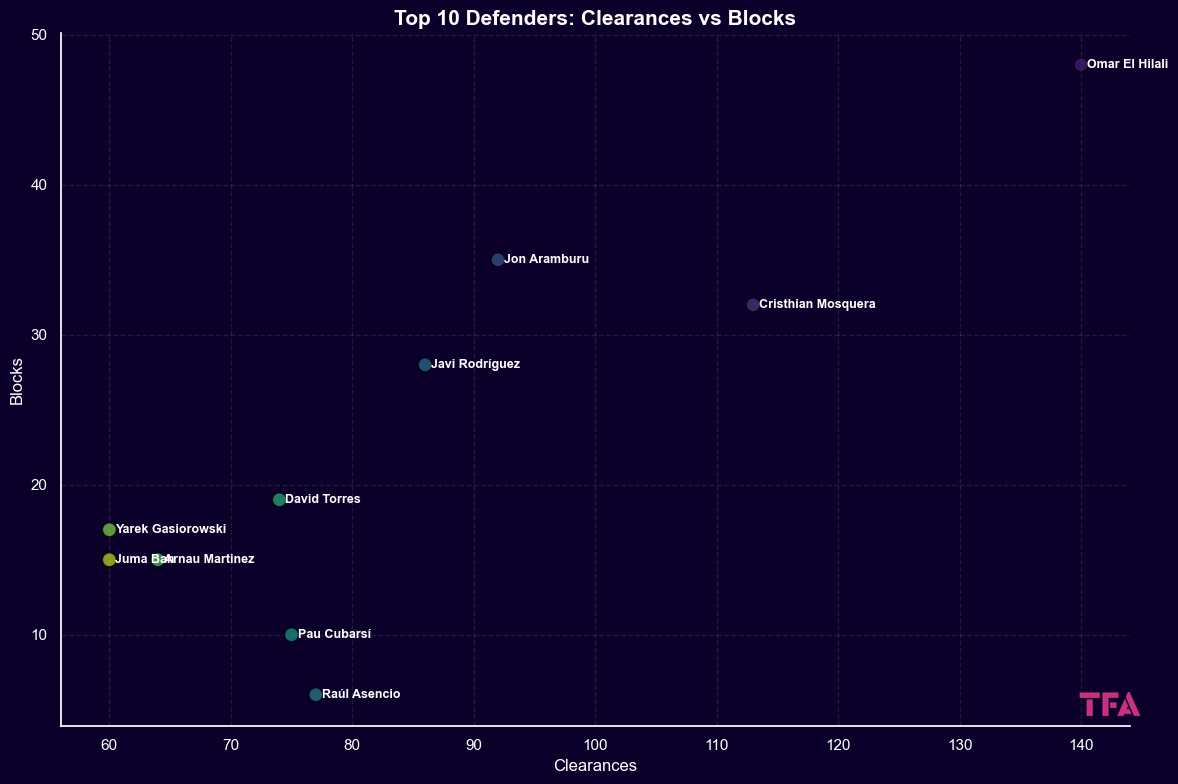

In [5]:
df_defenders = df[df['Pos'] == 'DF'].copy()

x = df_defenders['Clr']
y = df_defenders['Blocks']

df_top_10 = df_defenders.nlargest(10, 'Clr')

colors = sns.color_palette("viridis", n_colors=len(df_top_10))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

scatter = ax.scatter(df_top_10['Clr'], df_top_10['Blocks'], c=colors, s=100, alpha=0.7, edgecolors='black')

for i, player in enumerate(df_top_10['Player']):
    ax.text(df_top_10['Clr'].iloc[i] + 0.5, df_top_10['Blocks'].iloc[i], player, fontsize=9, ha='left', va='center', color='white', weight='bold')

ax.set_title('Top 10 Defenders: Clearances vs Blocks', color='white', fontsize=15, weight='bold')
ax.set_xlabel('Clearances', color='white')
ax.set_ylabel('Blocks', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(color='white', linestyle='--', alpha=0.1)

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.2), int(logo_height * 0.2)))

fig.figimage(
    tfa_logo, 
    xo=1070, 
    yo=40,  
    alpha=0.8, 
    zorder=3
)

plt.tight_layout()
plt.show()

Top 20 Midfielders - Pass Completion

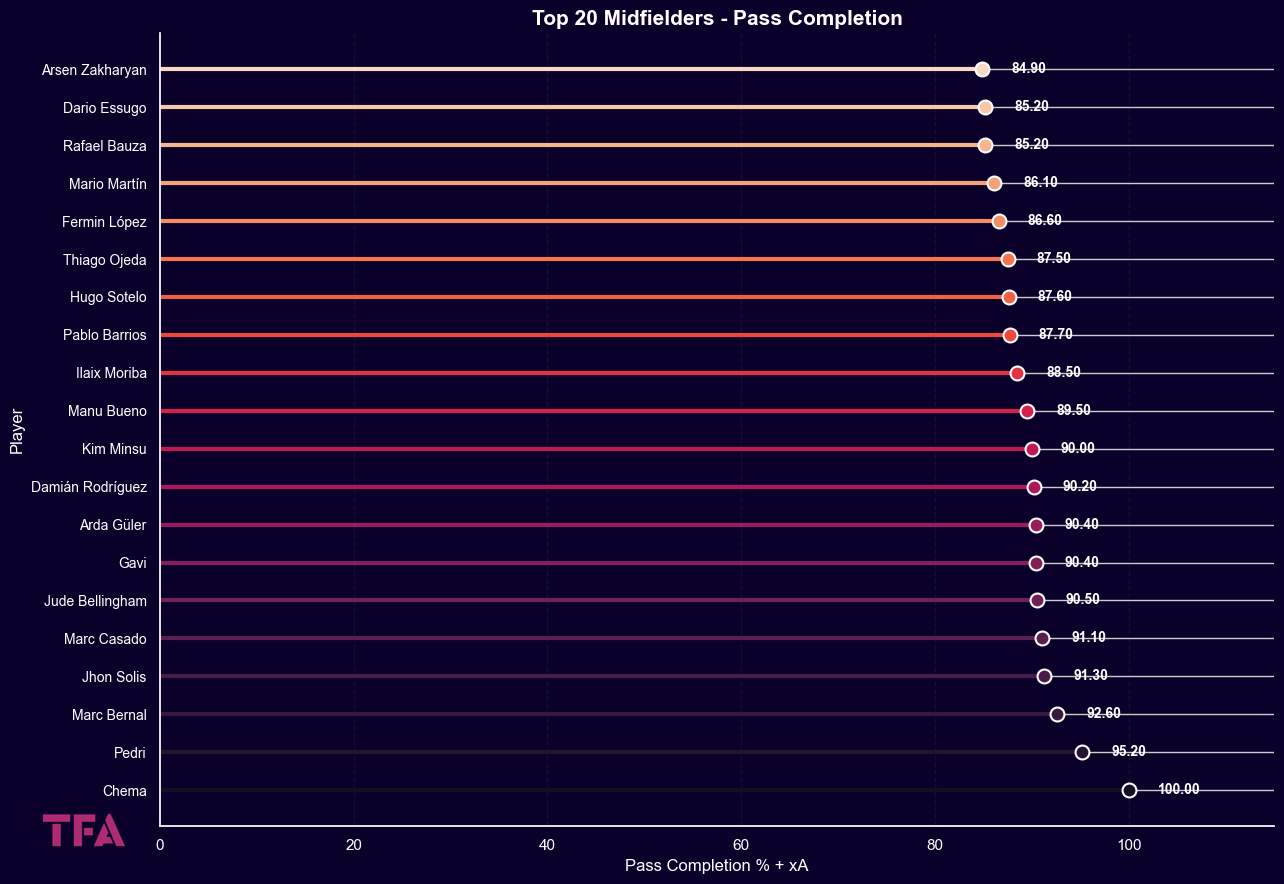

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

df_mf = df[df['Pos'] == 'MF'].copy()
df_mf['Creativity'] = df_mf['Cmp%'] + df_mf['xA']
df_top = df_mf.sort_values(by='Creativity', ascending=False).head(20)

players = df_top['Player']
creativity = df_top['Creativity']
colors = sns.color_palette("rocket", n_colors=len(players))

fig, ax = plt.subplots(figsize=(13, 9))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

for i, (player, value) in enumerate(zip(players, creativity)):
    ax.hlines(y=i, xmin=0, xmax=value, color=colors[i], linewidth=3)
    ax.plot(value, i, 'o', markersize=10, color=colors[i], markeredgecolor='white', markeredgewidth=1.5)

max_value = creativity.max()
for i, value in enumerate(creativity):
    ax.text(value + max_value * 0.03, i, f'{value:.2f}', va='center', color='white', fontsize=10, weight='bold')

ax.set_yticks(range(len(players)))
ax.set_yticklabels(players, color='white', fontsize=10)
ax.set_xlim(0, max_value + max_value * 0.15)

ax.set_title('Top 20 Midfielders - Pass Completion', color='white', fontsize=15, weight='bold')
ax.set_xlabel('Pass Completion % + xA', color='white')
ax.set_ylabel('Player', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.05, axis='x')

plt.tight_layout()

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))
fig.figimage(tfa_logo, xo=30, alpha=0.7, zorder=1)

plt.show()

Midfielders - Short Pass  vs Long Pass

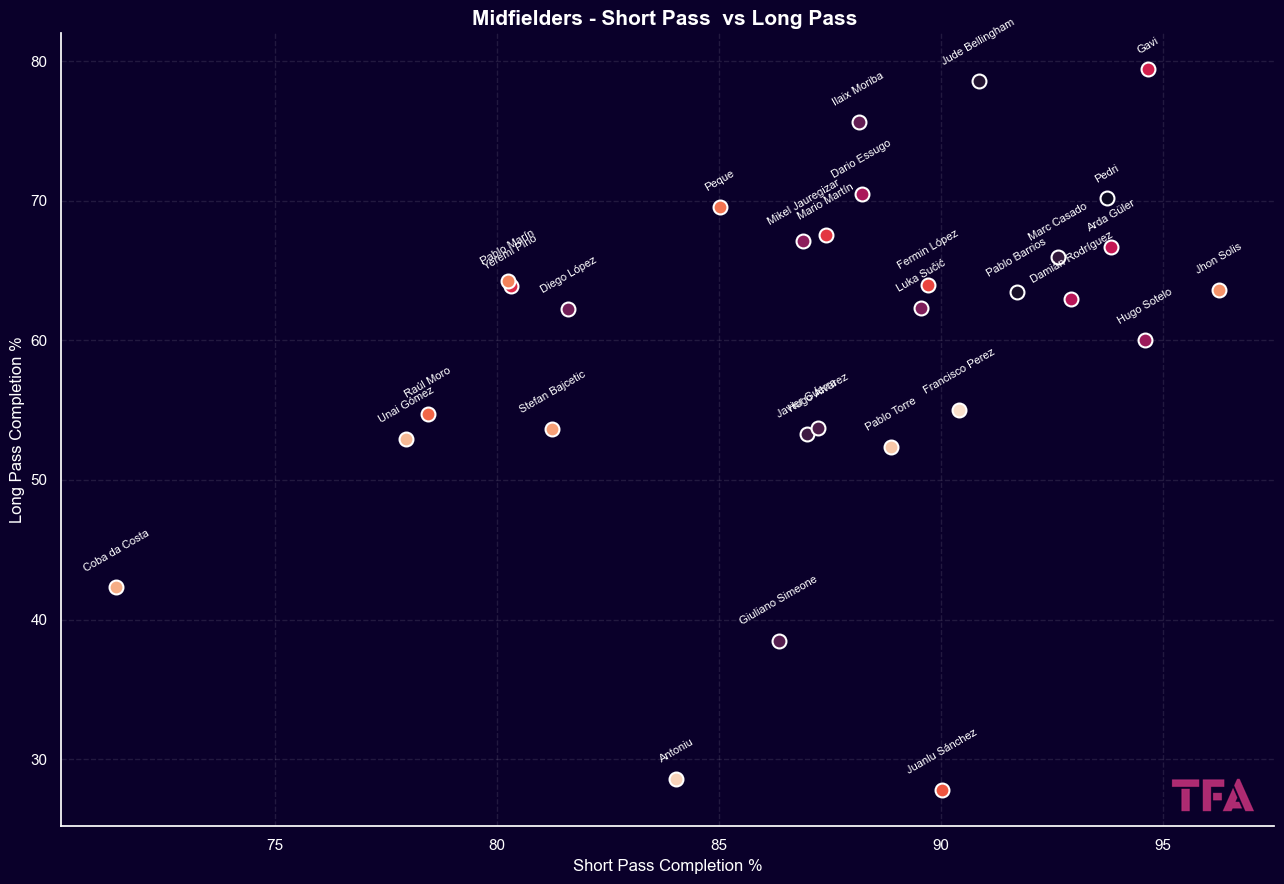

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

df_mf = df[df['Pos'] == 'MF'].copy()

df_mf['ShortPass%'] = (df_mf['ShortPassCmp'] / df_mf['ShortPassAttempts']) * 100
df_mf['LongPass%'] = (df_mf['LongPassCmp'] / df_mf['LongPassAttempts']) * 100

df_mf = df_mf[df_mf['ShortPassAttempts'] > 0]  
df_mf = df_mf[df_mf['LongPassAttempts'] > 0]
df_top = df_mf.sort_values(by='ShortPassAttempts', ascending=False).head(30)

players = df_top['Player']
short_pass_pct = df_top['ShortPass%'].values
long_pass_pct = df_top['LongPass%'].values
colors = sns.color_palette("rocket", n_colors=len(players))

fig, ax = plt.subplots(figsize=(13, 9))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

for i in range(len(players)):
    ax.plot(short_pass_pct[i], long_pass_pct[i], 'o-', color=colors[i], markersize=10, markeredgecolor='white', markeredgewidth=1.5)
    ax.text(short_pass_pct[i], long_pass_pct[i] + 1, players.iloc[i], ha='center', va='bottom', color='white', fontsize=8, rotation=30)

ax.set_title('Midfielders - Short Pass  vs Long Pass ', color='white', fontsize=15, weight='bold')
ax.set_xlabel('Short Pass Completion %', color='white')
ax.set_ylabel('Long Pass Completion %', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.1)

plt.tight_layout()

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))
fig.figimage(tfa_logo, xo=1159, yo=35, alpha=0.7, zorder=1)

plt.show()

Top 15 Midfielders - Progressive Passes + Key Passes

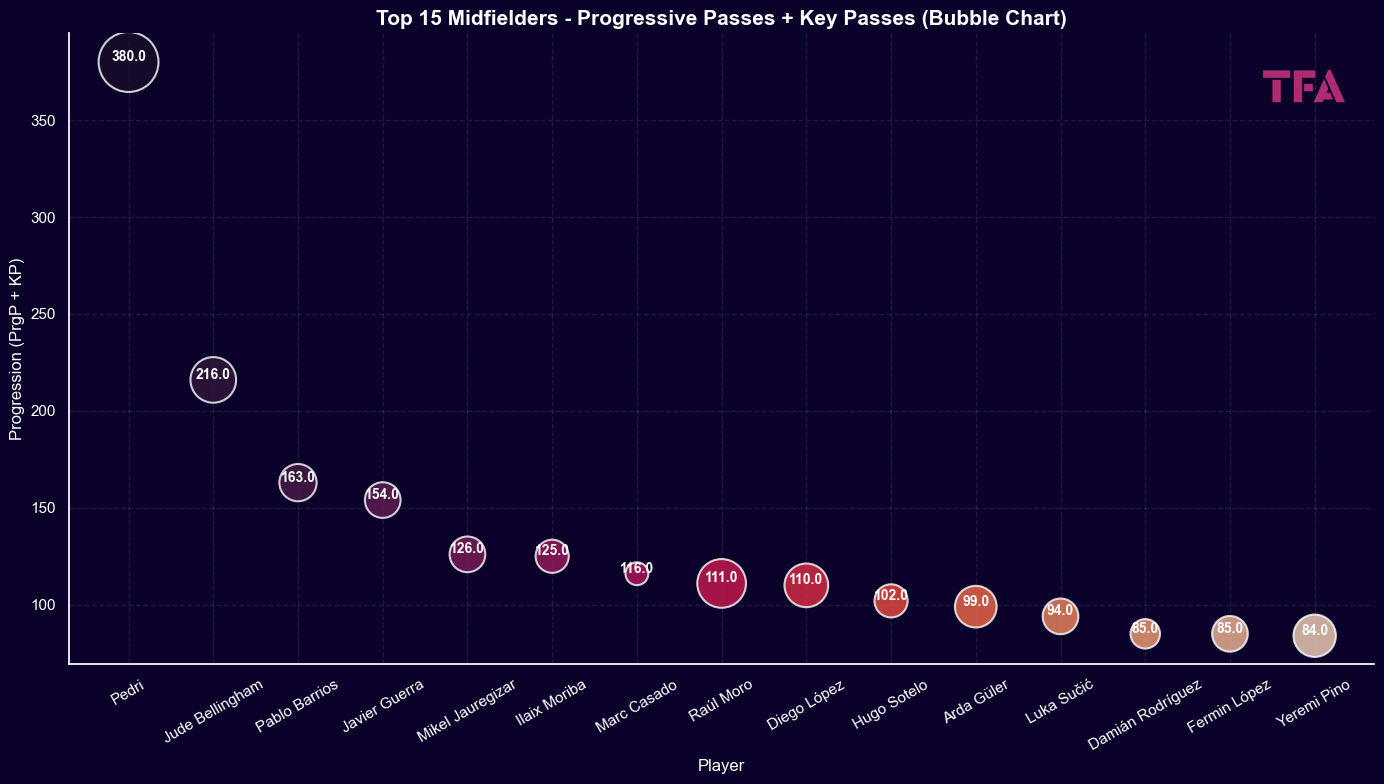

In [86]:
from PIL import Image

df_mf = df[df['Pos'] == 'MF'].copy()
df_mf['Progression'] = df_mf['PrgP'] + df_mf['KP']
df_top = df_mf.sort_values(by='Progression', ascending=False).head(15)

players = df_top['Player']
progression = df_top['Progression']
kp = df_top['KP']  
colors = sns.color_palette("rocket", n_colors=len(players))

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bubble_sizes = [p * 30 for p in kp]
scatter = ax.scatter(players, progression, s=bubble_sizes, c=colors, edgecolors='white', linewidths=1.5, alpha=0.8)

for i, player in enumerate(players):
    ax.text(player, progression.iloc[i] + 0.5, f'{progression.iloc[i]:.1f}', 
            ha='center', color='white', fontsize=10, weight='bold', rotation=0)

ax.set_title('Top 15 Midfielders - Progressive Passes + Key Passes (Bubble Chart)', 
             color='white', fontsize=15, weight='bold')
ax.set_xlabel('Player', color='white')
ax.set_ylabel('Progression (PrgP + KP)', color='white')
ax.tick_params(axis='x', colors='white', rotation=30)
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.1)

plt.tight_layout()

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))
fig.figimage(tfa_logo, xo=1250, yo= 644, alpha=0.7, zorder=1)

plt.show()

Goal Contributions and Expected Assists (Top 10 Midfielders)

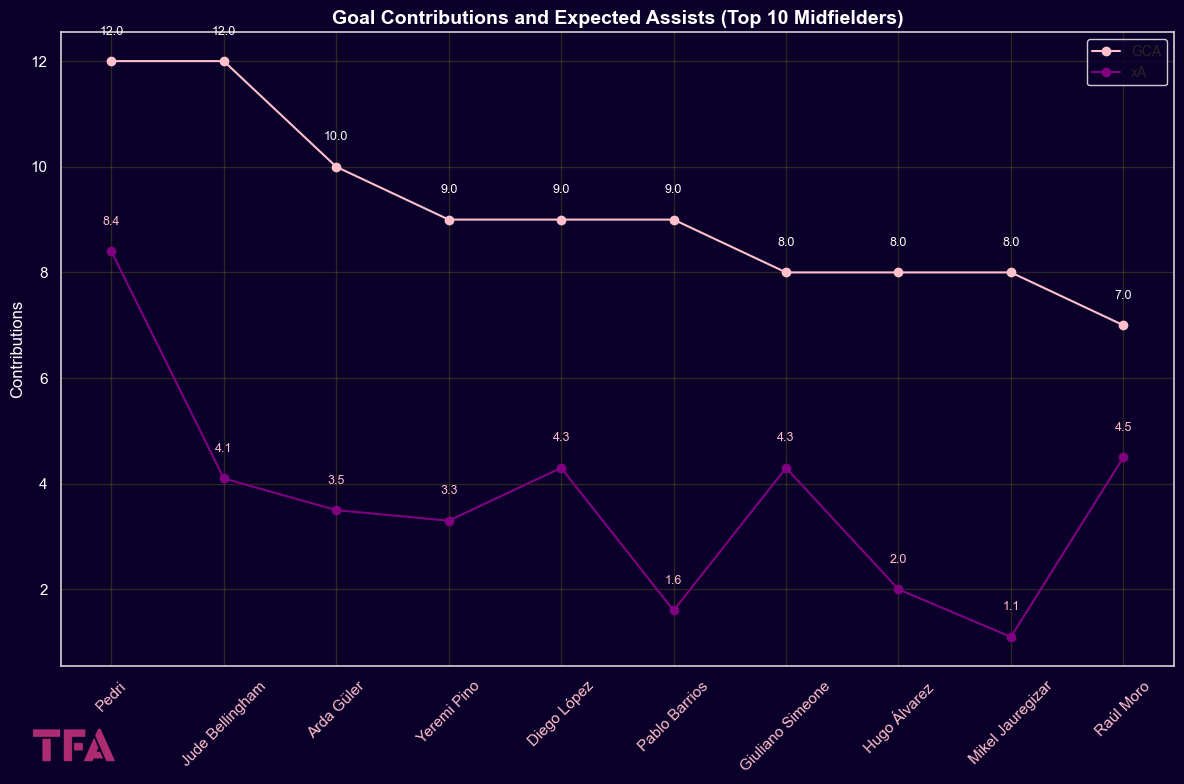

In [82]:
from PIL import Image

df_mf_gca = df[df['Pos'].str.contains('MF')].copy() 
df_mf_gca = df_mf_gca.sort_values(by='GCA', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')  
fig.patch.set_facecolor('#0A002A') 

ax.plot(df_mf_gca['Player'], df_mf_gca['GCA'], color='pink', marker='o', label='GCA')
ax.plot(df_mf_gca['Player'], df_mf_gca['xA'], color='purple', marker='o', linestyle='-', label='xA')

for i, player in df_mf_gca.iterrows():
    ax.text(player['Player'], player['GCA'] + 0.5, f"{player['GCA']:.1f}", color='white', ha='center', fontsize=9)
    ax.text(player['Player'], player['xA'] + 0.5, f"{player['xA']:.1f}", color='pink', ha='center', fontsize=9)

ax.set_ylabel('Contributions', color='white', fontsize=12)
ax.set_title('Goal Contributions and Expected Assists (Top 10 Midfielders)', color='white', fontsize=14, weight='bold')
ax.tick_params(axis='x', colors='pink', rotation=45)
ax.tick_params(axis='y', colors='white')

ax.grid(True, color='yellow', linestyle='-', alpha=0.15, axis='both')

ax.legend(facecolor='#0A002A', edgecolor='white', fontsize=10, loc='upper right')

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))

fig.figimage(
    tfa_logo, 
    xo=20, 
    yo=-15,
    alpha=0.7, 
    zorder=1
)

plt.tight_layout()
plt.show()


Shot Accuracy and Goal Threat (Top 10 Forwards)

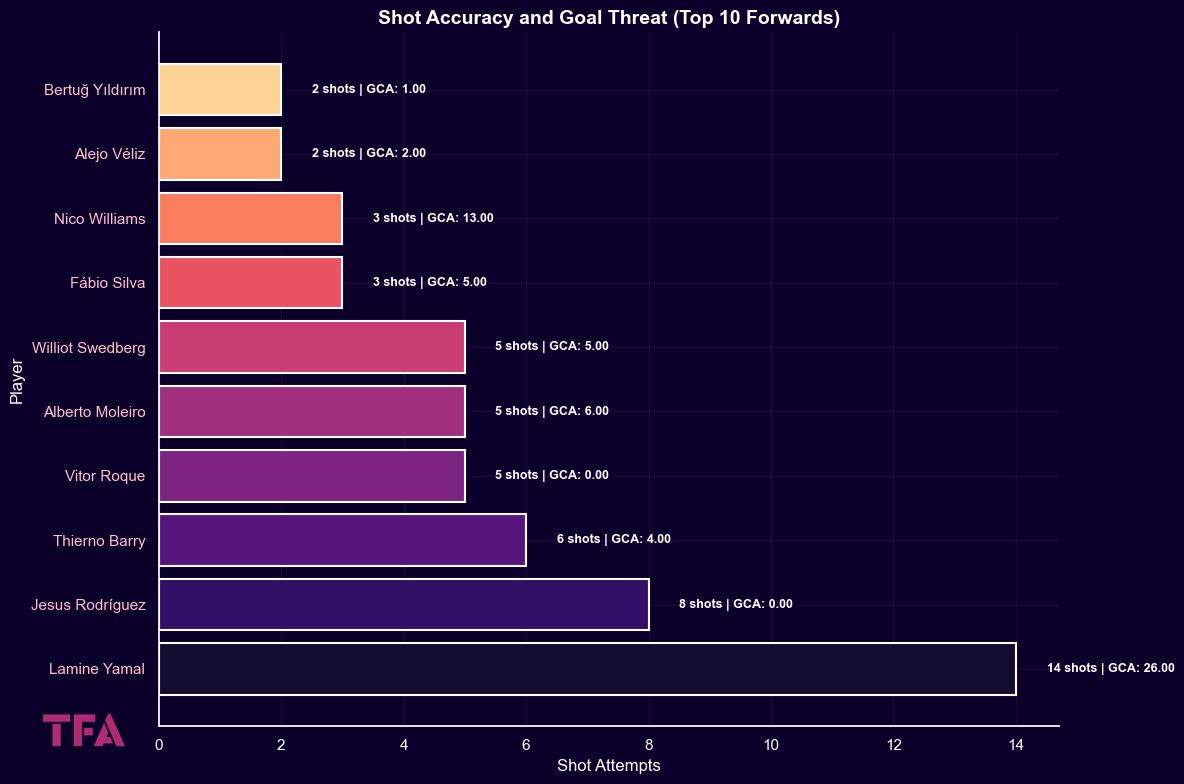

In [73]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

df_fw_pass = df[df['Pos'].str.contains('FW')].copy()
df_fw_pass = df_fw_pass.sort_values(by='Cmp%', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')  
fig.patch.set_facecolor('#0A002A')

colors = sns.color_palette("magma", n_colors=len(df_fw_pass))

bars = ax.barh(df_fw_pass['Player'], df_fw_pass['Cmp%'], color=colors, edgecolor='white', linewidth=1.5)

for bar, kp in zip(bars, df_fw_pass['KP']):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f"{width:.1f}% | KP: {kp:.1f}",
            ha='left', va='center', color='white', fontsize=9, weight='bold')

ax.set_xlabel('Pass Completion %', color='white', fontsize=12)
ax.set_ylabel('Player', color='white', fontsize=12)
ax.set_title('Pass Distribution and Link-Up Play (Top 20 Forwards)', color='white', fontsize=14, weight='bold')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='pink')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(color='white', linestyle='-', alpha=0.05)

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))
fig.figimage(tfa_logo, xo=30, alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()

Pressing and Defensive Workrate (Top 10 Forwards)

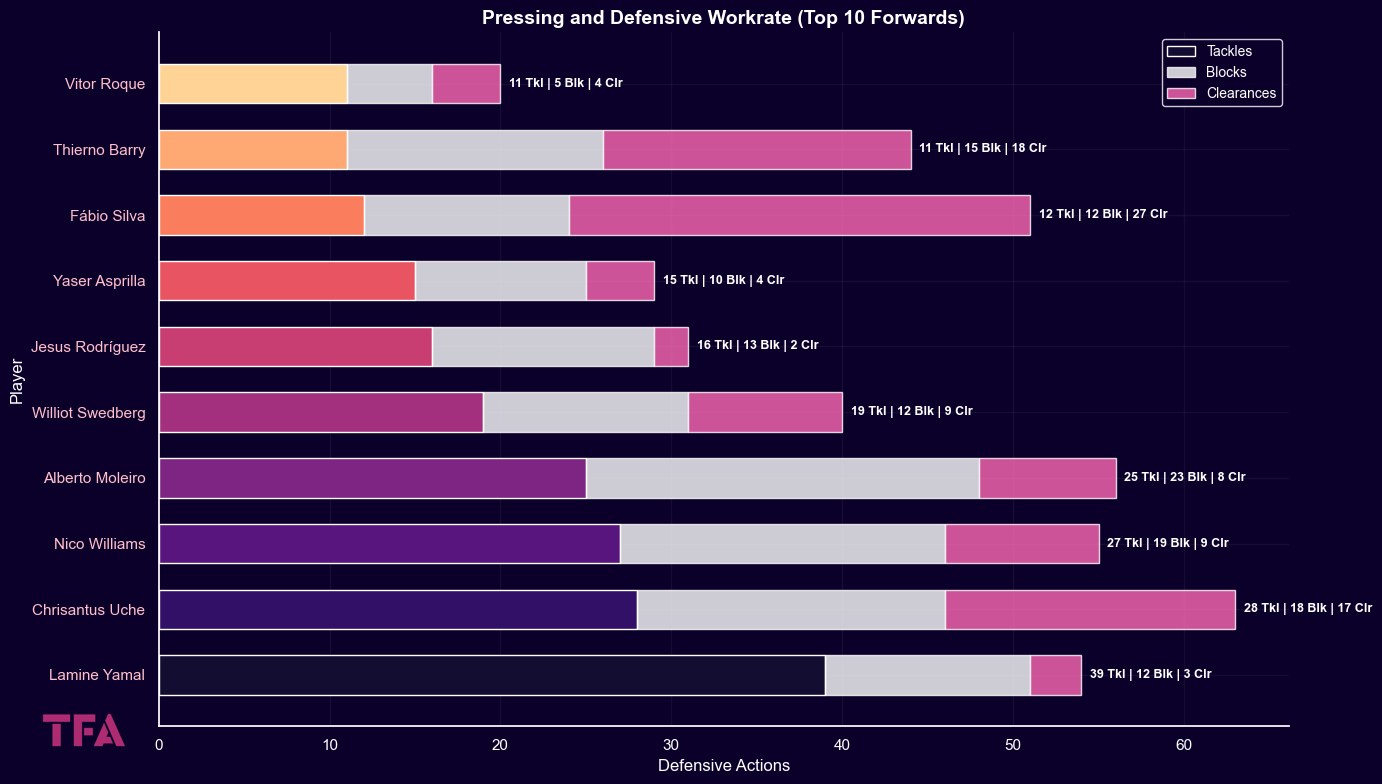

In [93]:
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

df_fw_def = df[df['Pos'].str.contains('FW')].copy()
df_fw_def = df_fw_def.sort_values(by='Tkl', ascending=False).head(10)

players = df_fw_def['Player']
tackles = df_fw_def['Tkl']
blocks = df_fw_def['Blocks']
clearances = df_fw_def['Clr']

colors = sns.color_palette("magma", n_colors=len(players))

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('#0A002A')  
fig.patch.set_facecolor('#0A002A') 

bars1 = ax.barh(players, tackles, color=colors, edgecolor='white', label='Tackles', height=0.6)
bars2 = ax.barh(players, blocks, left=tackles, color='white', edgecolor='white', label='Blocks', height=0.6, alpha=0.8)
bars3 = ax.barh(players, clearances, left=tackles + blocks, color='#FF69B4', edgecolor='white', label='Clearances', height=0.6, alpha=0.8)

for i in range(len(players)):
    total = tackles.iloc[i] + blocks.iloc[i] + clearances.iloc[i]
    ax.text(total + 0.5, i, f"{tackles.iloc[i]:.0f} Tkl | {blocks.iloc[i]:.0f} Blk | {clearances.iloc[i]:.0f} Clr",
            va='center', ha='left', color='white', fontsize=9, weight='bold')

ax.set_xlabel('Defensive Actions', color='white', fontsize=12)
ax.set_ylabel('Player', color='white', fontsize=12)
ax.set_title('Pressing and Defensive Workrate (Top 10 Forwards)', color='white', fontsize=14, weight='bold')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='pink')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(color='white', linestyle='-', alpha=0.05)

legend = ax.legend(facecolor='#0A002A', edgecolor='white', fontsize=10)
for text in legend.get_texts():
    text.set_color('white')

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))
fig.figimage(tfa_logo, xo=30, alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()

Expected Goals and Actual Finishing (Top 20 Forwards)

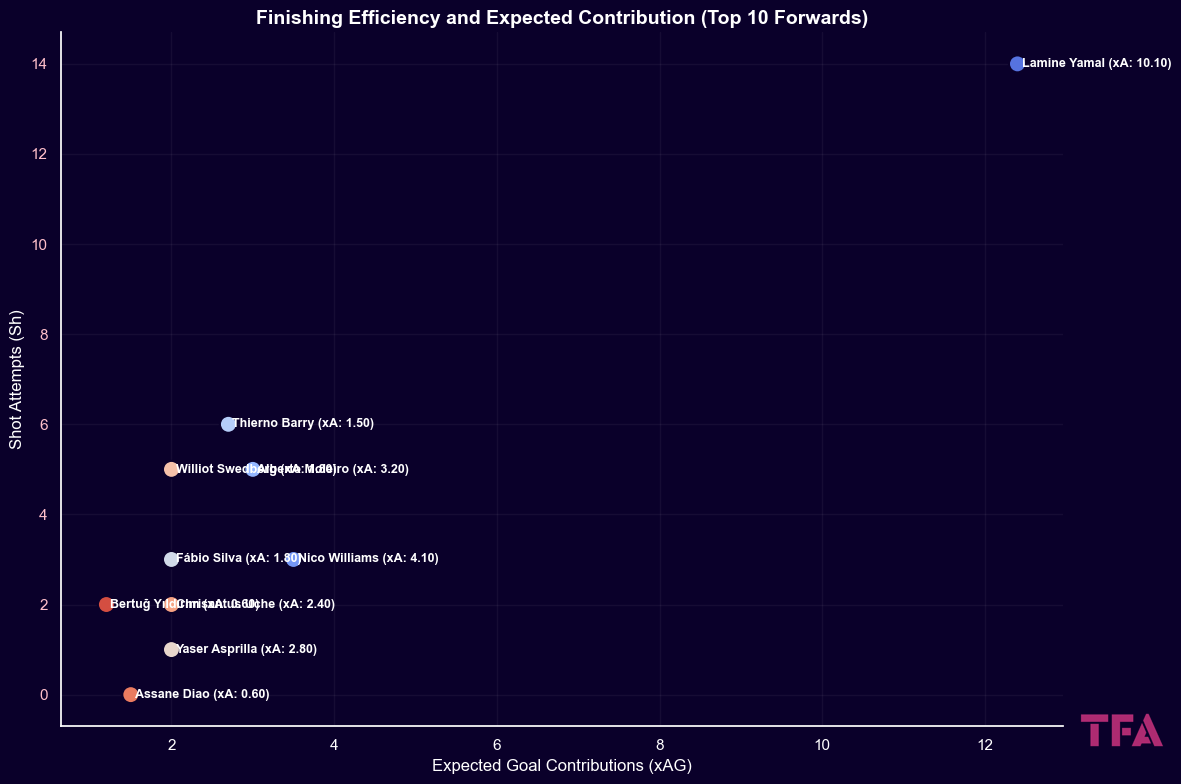

In [105]:
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

df_fw_fin = df[df['Pos'].str.contains('FW')].copy()
df_fw_fin = df_fw_fin.sort_values(by='xAG', ascending=False).head(10)

colors = sns.color_palette("coolwarm", n_colors=len(df_fw_fin))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')  
fig.patch.set_facecolor('#0A002A') 

scatter = ax.scatter(df_fw_fin['xAG'], df_fw_fin['Sh'], color=colors, edgecolor='#0A002A', s=150, linewidth=1.5)

for i, player in df_fw_fin.iterrows():
    ax.text(player['xAG'] + 0.05, player['Sh'],
            f"{player['Player']} (xA: {player['xA']:.2f})",
            color='white', fontsize=9, weight='bold', va='center')

ax.set_xlabel('Expected Goal Contributions (xAG)', color='white', fontsize=12)
ax.set_ylabel('Shot Attempts (Sh)', color='white', fontsize=12)
ax.set_title('Finishing Efficiency and Expected Contribution (Top 10 Forwards)', color='white', fontsize=14, weight='bold')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='pink')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(color='white', linestyle='-', alpha=0.05)

tfa_logo = Image.open("D:\\Work\\Data Analysis TFA\\05 Analysing Spain's Emerging Talents in 2025\\logos\\TFA.png")
tfa_logo = tfa_logo.convert("RGBA")
logo_width, logo_height = tfa_logo.size
tfa_logo = tfa_logo.resize((int(logo_width * 0.27), int(logo_height * 0.27)))
fig.figimage(tfa_logo, xo=1068, alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()